In [1]:
from client_side.client import client
from server_side.workers import phone_support
from server_side.vm import vm_deliver
from server_side.server import server
from settings.statistic import statistic_collector
from simpy import Environment
import matplotlib.pyplot as plt
from settings.vonfig import config
import pandas
import numpy as np

time = 500
skip = 0
env = Environment()
client(env, phone_support(env), vm_deliver(env, server(env, "server")))
env.run(until=time)
statistic_collector.save()

In [2]:
for key in statistic_collector.load:
    print(f"{key}: {statistic_collector.load[key]}")

clien_count: 534
client_vms_1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 21, 22, 22, 23, 23, 23, 23, 24, 25, 26, 26, 27, 27, 27, 27, 28, 29, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 34, 34, 35, 35, 36, 36, 36, 36, 36, 37, 38, 38, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 47, 0, 1, 2, 2, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 4, 5, 0, 1, 2, 3, 4, 0, 1]
break_vm: 4176
break_time_vm: [40, 61, 87, 106, 111, 116, 120, 120, 133, 134, 135, 138, 142, 142, 143, 143, 145, 149, 152, 154, 158, 159, 159, 164, 167, 168, 170, 171, 175, 176, 177, 178, 178, 180, 180, 182, 187, 187, 190, 190, 192, 192, 193, 193, 194, 195, 197, 197, 198, 199, 199, 200, 201, 202, 203, 203, 205, 205, 206, 206, 208, 208, 209, 212, 213, 214, 218, 219, 219, 219, 219, 219, 220, 221, 221, 222, 222, 222, 223, 224, 226, 226, 226, 227, 227, 227, 227, 228, 228, 228, 229, 230, 231, 231, 231, 231, 232, 23

In [3]:
df = pandas.DataFrame()
import warnings
warnings.filterwarnings("ignore")
for key in statistic_collector.load:
    if key[:10] == "client_vms":
        if len(statistic_collector.load[key]) == 1 and statistic_collector.load[key][0] == 0:
            continue
        # plt.plot(statistic_collector.load[key])
        x = [np.NaN] * (time // 2 - len(statistic_collector.load[key])) + statistic_collector.load[key]
        try:
            df[key] = np.array(x)
        except:
            print(key)
        
df['mean'] = df.mean(axis=1)        
df['median'] = df.median(axis=1)        
df["sum"] = df.sum(axis=1)
df1 = df.iloc[skip:]
df.head()


,client_vms_1,client_vms_12,client_vms_13,client_vms_134,client_vms_15,client_vms_126,client_vms_127,client_vms_158,client_vms_1279,client_vms_140,...,client_vms_2501088,client_vms_18332169,client_vms_256410,client_vms_346941,client_vms_129086032,client_vms_1287643,client_vms_30499804,mean,median,sum
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
df.to_csv("stat_1.csv")

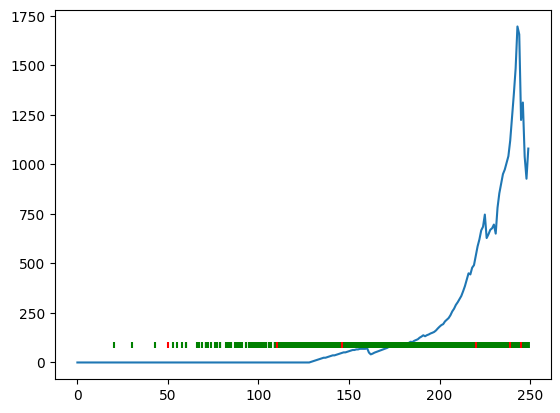

In [5]:
plt.plot(df['sum'])
plt.vlines([x // 2 for x in statistic_collector.load["break_time_vm"]], df['sum'].mean() * 0.45, df['sum'].mean() * 0.65, 'g')
plt.vlines([x // 2 for x in statistic_collector.load["break_time_hadoop_claster"]], df['sum'].mean() * 0.45, df['sum'].mean() * 0.65, 'r')
plt.vlines([x // 2 for x in statistic_collector.load["break_time_proxmox_claster"]], df['sum'].mean() * 0.45, df['sum'].mean() * 0.65, 'r')

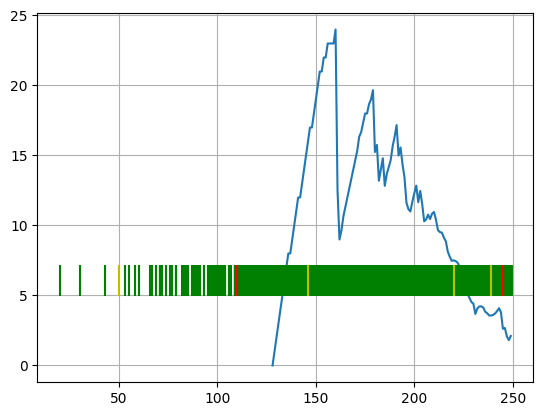

In [6]:
plt.plot(df['mean'])
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_vm"]], df['mean'].mean() * 0.45,df['mean'].mean() * 0.65, 'g')
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_hadoop_claster"]], df['mean'].mean() * 0.45, df['mean'].mean() * 0.65, 'y')
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_proxmox_claster"]], df['mean'].mean() * 0.45, df['mean'].mean() * 0.65, 'r')
plt.grid()

In [7]:
df['mean'].mean()

11.037530104047637

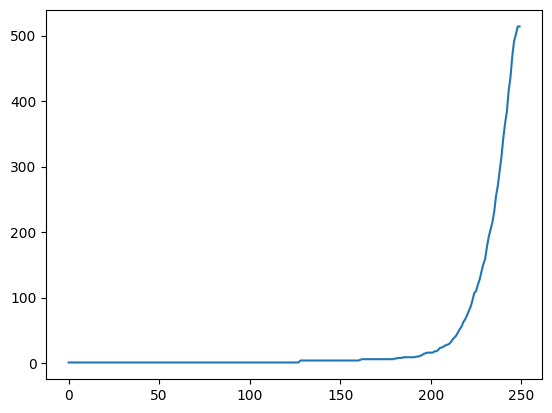

In [8]:
df['non_null_count'] = df.count(axis=1)
plt.plot(df['non_null_count'])

In [10]:
from settings.vonfig import config
print((statistic_collector.load["fixing_devops"] / config["WORKER_AMOUNT"]["DEVOPS"]) / time)
print((statistic_collector.load["fixing_hadoop_enj"] / config["WORKER_AMOUNT"]["HADOOP_ENJ"]) / time)
print((statistic_collector.load["fixing_proxmox_enj"] / config["WORKER_AMOUNT"]["PROXMOX_ENJ"]) / time)

0.504
0.024
0.012
